<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/jttoivon/x/blob/master/pandas.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Pandas

In the NumPy section we dealt with some arrays, whose columns had each a special meaning. For example, the column number 0 could contains values interpreted as years, and column 1 could contain a month, and so on. It is possible to handle the data this way, but in can be hard to remember, which column number corresponds to which variable. Especially, if you later remove some column from the array, then the numbering of the remaining columns changes. One solution to this is to give a descriptive name to each column. These column names stay fixed and attached to their corresponding columns, even if we remove some of the columns. In addition, the rows can be given names as well, these are called *indices* in Pandas.

The *Pandas* library is build on top of the NumPy library, and it provides a special kind of two dimensional data structure called `DataFrame`. The `DataFrame` allows to give names to the columns, so that one can access a column using its name inplace of the index of the column.

The quickly go through few examples to see what is possible with Pandas. It is typical to import the Pandas library as the shorthand `pd`.

In [2]:
import pandas as pd    # This is the standard way of importing the Pandas library
import numpy as np

In [3]:
wh = pd.read_csv("https://www.cs.helsinki.fi/u/jttoivon/dap/data/fmi/kumpula-weather-2017.csv")
wh.head()   # The head method prints the first 5 rows

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


Now we can refer to a column by its name:

In [4]:
wh["Snow depth (cm)"].head()     # Using the tab key can help enter long column names

0    -1.0
1    -1.0
2     7.0
3    13.0
4    10.0
Name: Snow depth (cm), dtype: float64

In [5]:
wh["Air temperature (degC)"].mean()    # Mean temperature

6.527123287671233

In [6]:
wh.drop("Time zone", axis=1).head()    # Return a copy with one column removed, the original DataFrame stays intact

,Year,m,d,Time,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2017,1,1,00:00,-1.0,-1.0,0.6
1,2017,1,2,00:00,4.4,-1.0,-3.9
2,2017,1,3,00:00,6.6,7.0,-6.5
3,2017,1,4,00:00,-1.0,13.0,-12.8
4,2017,1,5,00:00,-1.0,10.0,-17.8


In [7]:
wh.head()

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


We will now go through systematically through the DataFrame and its one-dimensional version: *Series*.

## Creation and indexing of series

One can turn any one-dimensional iterable into a Series:

In [8]:
s=pd.Series([1, 4, 5, 2, 5, 2])
s

0    1
1    4
2    5
3    2
4    5
5    2
dtype: int64

The data type of the elements in the Series is `int64`, integers representable in 64 bits. 

We can also attach a name to this series:

In [9]:
s.name = "Grades"
s

0    1
1    4
2    5
3    2
4    5
5    2
Name: Grades, dtype: int64

The common attributes of the series are the `name`, `dtype`, and `size`:

In [10]:
print("Name: %s, dtype: %s, size: %s" % (s.name, s.dtype, s.size))

Name: Grades, dtype: int64, size: 6


In addition to the values of the series, also the row indices were printed. All the accessing methods from NumPy arrays also work for the Series: indexing, slicing, and fancy indexing. 

In [11]:
s[1]

4

In [12]:
s2=s[[0,5]]                    # Fancy indexing

In [13]:
t=s[-2:]                    # Slicing
t

4    5
5    2
Name: Grades, dtype: int64

Note that the indices stick to the corresponding values, they are not renumbered!

In [14]:
t[4]                        # t[0] would give an error

5

The values as a NumPy array are accessible with the `values` attribute:

In [15]:
s2.values

array([1, 2])

And the indices are available through the `index` attribute:

In [16]:
s2.index

Int64Index([0, 5], dtype='int64')

The index is not simply a NumPy array, but a data structure that allows fast access to the elements. The indices need not be integers, as the next example shows:

In [17]:
s3=pd.Series([1, 4, 5, 2, 5, 2], index=list("abcdef"))
s3

a    1
b    4
c    5
d    2
e    5
f    2
dtype: int64

In [18]:
s3.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [19]:
s3["b"]

4

<div class="alert alert-warning">
Note a special case here: if the indices are not integers, then the last index of the slice is included in the result. This is contrary to slicing with integers!
</div>

In [20]:
s3["b":"e"]

b    4
c    5
d    2
e    5
dtype: int64

It is still possible to access the series using NumPy style *implicit integer indices*:

In [21]:
s3[1]

4

This can be confusing though. Consider the following series:

In [22]:
s4 = pd.Series(["Jack", "Jones", "James"], index=[1,2,3])
s4

1     Jack
2    Jones
3    James
dtype: object

What do you think `s4[1]` will print? For this ambiguity Pandas offers attributes `loc` and `iloc`. The attributes `loc` always uses the explicit index, while the attribute `iloc` always uses the implicit integer index:

In [24]:
print(s4.loc[1])
print(s4.iloc[1])

Jack
Jones


### Onko seuraava pätkä tarpeen?
One may notice that there are similarities between Python's dictionaries and Pandas' Series, both can be thought to access values using keys. The difference is that Series requires that the indices have all the same type, and similarly, all the values have the same type. This restriction allows creation of fast data structures.

As a mark of the similaries between these two data structures, Pandas allows creation of a `Series` object from a dictionary:

In [131]:
d = { 2001 : "Bush", 2005: "Bush", 2009: "Obama", 2013: "Obama", 2017 : "Trump"}
s4 = pd.Series(d, name="Presidents")
s4

2001     Bush
2005     Bush
2009    Obama
2013    Obama
2017    Trump
Name: Presidents, dtype: object

## Creation of dataframes

As the DataFrame is essentially a two dimensional object, it can be created in three different ways:

* out of a two dimensional NumPy array
* out of given columns
* out of given rows

### Creating DataFrames from a NumPy array

In [37]:
df=pd.DataFrame(np.random.randn(2,3), columns=["First", "Second", "Third"], index=["a", "b"])
df

,First,Second,Third
a,1.111017,1.682419,0.886814
b,0.165610,0.991239,1.273147


Note that now both the rows and columns can be accessed using the special `Index` object:

In [38]:
df.index                            # These are the "row names"

Index(['a', 'b'], dtype='object')

In [40]:
df.columns                          # These are the "column names"

Index(['First', 'Second', 'Third'], dtype='object')

If either `columns` or `index` argument is left out, then an integer index will be used:

In [36]:
pd.DataFrame(np.random.randn(2,3), index=["a", "b"])

,0,1,2
a,-0.716002,0.415096,-1.075494
b,0.946747,0.369208,-1.684134


### Creating DataFrames from columns

A columns can be specified as a list, an NumPy array, or a Pandas' Series. The names of the columns can be given either with the `columns` parameter, or if Series objects are, then the `name` attribute of each Series is used as the columns name.

In [42]:
s1 = pd.Series([1,2,3])
s1

0    1
1    2
2    3
dtype: int64

In [44]:
s2 = pd.Series([4,5,6], name="b")
s2

0    4
1    5
2    6
Name: b, dtype: int64

In [45]:
pd.DataFrame(s1, columns=["a"])

,a
0,1
1,2
2,3


In [46]:
pd.DataFrame(s2)

,b
0,4
1,5
2,6


If using multiple columns, then they must be given as the dictionary, whose keys give the column names and values are the actual column content.

In [48]:
pd.DataFrame({"a": s1, "b": s2})

,a,b
0,1,4
1,2,5
2,3,6


### Creating DataFrames from rows

We can give a list of rows as a parameter to the DataFrame constructor. If we want to give names for the columns, then the rows must be dictionaries, where the key is the column name and the values are the elements of the DataFrame on that row and columns. An example of this:

In [58]:
df=pd.DataFrame([{"Wage" : 1000, "Name" : "Jack", "Age" : 21}, {"Wage" : 1500, "Name" : "John", "Age" : 29}])
df

,Age,Name,Wage
0,21,Jack,1000
1,29,John,1500


<div class="alert alert-warning">Note that the order of columns is not always the same order as they were in the parameter list. In this case you can use the `columns` parameter to specify the exact order.


In the earlier case, however, where we created DataFrames from a dictionary of columns, the order of columns should be the same as in the parameter dictionary in the recent versions of Python and Pandas.
</div>

## Accessing columns and rows of a dataframe

Even though DataFrames are basically just two dimensional arrays, the way to access their elements is different from NumPy arrays. There are a couple of complications, which we will go through in this section.

Firstly, the bracket notation `[]` does not allow the use of an index pair to access a single element of the DataFrame. Instead only one dimension can be specified.

Well, does this dimension specify the rows of the DataFrame, like NumPy arrays if only one index is given, or does it specify the columns of the DataFrame?

It depends!

If an integer is used, then it specifies a column of the DataFrame in the case the **explicit** indices for the column contain that integer. In any other case an error will result. For example, with the above DataFrame, the following indexing will not work, because the explicit column index consist of the column names "Name" and "Wage" are not integers:

In [56]:
try:
    df[0]
except KeyError:
    import sys
    print("Key error", file=sys.stderr)

Key error


The following will however work.

In [57]:
df["Wage"]

0    1000
1    1500
Name: Wage, dtype: int64

As does the fancy indexing:

In [59]:
df[["Wage", "Name"]]

,Wage,Name
0,1000,Jack
1,1500,John


If one indexes with a slice or a boolean mask, then the rows are referred to. Examples of these:

In [62]:
df[0:1]                           # slice

,Age,Name,Wage
0,21,Jack,1000


In [64]:
df[df.Wage > 1200]               # boolean mask

1    29
Name: Age, dtype: int64

If some of the above calls return a Series object, then you can chain the bracket calls to get a single value from the DataFrame:

In [66]:
df["Wage"][1]                    # Note order of dimensions

1500

But there is a better way to achieve this!

## Alternative indexing and data selection

If the explanation in the previous section sounded confusing or ambiguous, or if you didn't understand a thing, you don't have to worry.

There is another way to index Pandas DataFrames, which

* allows index pairs to access a single element
* has the same order of dimensions as NumPy: first index specifies rows, second columns
* is not ambiguous about implicit or explicit indices

Pandas DataFrames have to attributes `loc` and `iloc` that have the above qualities.
You can use `loc` and `iloc` attributes and forget everything about the previous section. Or you can use these attributes
and sometimes use the methods from the previous section as shortcuts if you understand them well.

The difference between `loc` and `iloc` attributes is that the former uses explicit indices and the latter uses the implicit integer indices. Examples of use:

In [67]:
df.loc[1, "Wage"]

1500

In [68]:
df.iloc[-1,-1]             # Right lower corner of the DataFrame

1500

In [69]:
df.loc[1, ["Name", "Wage"]]

Name    John
Wage    1500
Name: 1, dtype: object

With `iloc` everything works like with NumPy arrays: indexing, slicing, fancy indexing, masking and their combinations. With `loc` it is the same but now the names in the explicit indices are used for specifying rows and columns.

## Summary statistics

The summary statistic methods work in a similar way as their counter parts in NumPy. By default, the aggregation is done over columns.

In [19]:
wh2 = wh.drop(["Year", "m", "d"], axis=1)  # taking averages over these is not very interesting
wh2.mean()

Precipitation amount (mm)    1.966301
Snow depth (cm)              0.966480
Air temperature (degC)       6.527123
dtype: float64

The `describe` method of the `DataFrame` object gives different summary statistics for each (numeric) column. The result is a DataFrame. This method gives a good overview of the data.

In [16]:
wh.describe()

,Year,m,d,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
count,365.0,365.000000,365.000000,365.000000,358.000000,365.000000
mean,2017.0,6.526027,15.720548,1.966301,0.966480,6.527123
std,0.0,3.452584,8.808321,4.858423,3.717472,7.183934
min,2017.0,1.000000,1.000000,-1.000000,-1.000000,-17.800000
25%,2017.0,4.000000,8.000000,-1.000000,-1.000000,1.200000
50%,2017.0,7.000000,16.000000,0.200000,-1.000000,4.800000
75%,2017.0,10.000000,23.000000,2.700000,0.000000,12.900000
max,2017.0,12.000000,31.000000,35.000000,15.000000,19.600000


## Missing data

You may have noticed something strange in the output of the `describe` method. First, the minimum value in both precipitation and snow depth fields is -1. The special value -1 means that on that day there was absolutely no snow or rain, whereas the value 0 might indicate that the value is close to zero. Secondly, the snow depth column has count 358, whereas the other columns have count 365, one measurement/value for each day of the year. How is this possible? Every field in a DataFrame should have the same number of rows. Let's use the `unique` method of the Series object to find out, which different values are used in this column:

In [6]:
wh["Snow depth (cm)"].unique()

array([-1.,  7., 13., 10., 12.,  9.,  8.,  5.,  6.,  4.,  3., 15., 14.,
        2., nan,  0.])

The `float` type allows a special value `nan` (Not A Number), in addition to normal floating point numbers. This value can represent the result from an illegal operation. For example, the operation 0/0 can either cause an exception to occur or just silently produce a `nan`. In Pandas `nan` can be used to represent a missing value. In the weather DataFrame the `nan` value tells us that the measurement from that day is not available, possibly due to a broken measuring instrument or some other problem.

Note that only float types allow the `nan` value. So, if we try to create an integer series with missing values, its dtype gets promoted to `float`:

In [23]:
pd.Series([1,3,2])

0    1
1    3
2    2
dtype: int64

In [26]:
pd.Series([1,3,2, np.nan])

0    1.0
1    3.0
2    2.0
3    NaN
dtype: float64

For non-numeric types the special value `None` is used to denote the missing value, and the dtype is promoted to `object`.

In [27]:
pd.Series(["jack", "joe", None])

0    jack
1     joe
2    None
dtype: object

Pandas excludes the missing values from the summary statistics, like we saw in the previous section. Pandas also provides some functions to handle missing values.

The missing values can be located with the `isnull` method:

In [29]:
wh.isnull()      # returns a boolean mask DataFrame

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


This is not very useful as we cannot directly use the mask to index the DataFrame. We can, however, combine it with the `any` method to find out all the rows that contain at least one missing value:

In [25]:
wh[wh.isnull().any(axis=1)]

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
74,2017,3,16,00:00,UTC,1.8,NaN,3.4
163,2017,6,13,00:00,UTC,0.6,NaN,12.6
308,2017,11,5,00:00,UTC,0.2,NaN,8.4
309,2017,11,6,00:00,UTC,2.0,NaN,7.5
313,2017,11,10,00:00,UTC,3.6,NaN,7.2
321,2017,11,18,00:00,UTC,11.3,NaN,5.9
328,2017,11,25,00:00,UTC,8.5,NaN,4.2


The `notnull` method works conversively to the `isnull` method.

The `dropna` method of a DataFrame drops columns or rows that contain missing values from the DataFrame, depending on the `axis` parameter.

In [29]:
wh.dropna().shape   # Default axis is 0

(358, 8)

In [31]:
wh.dropna(axis=1).shape # Drops the columns containing missing values

(365, 7)

The `how` and `thresh` parameters of the `dropna` method allow one to specify how many values need to be missing in order the row/column to be dropped.

The `fillna` method allows to fill the missing values with some constant or interpolated values. The `method` parameter can be:

* `None`: use the given positional parameter as the constant the fill missing values with
* `ffill`: use the previous value to fill the current value
* `bfill`: use the next value to fill the current value

For example, for the weather data we could use forward fill

In [33]:
wh = wh.fillna(method='ffill')
wh[wh.isnull().any(axis=1)]

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)


The `interpolate` method offers more elaborate ways to interpolate the missing values from their neighbouring non-missing values.

## Catenating datasets

We already saw in the NumPy section how we can catenate arrays along an axis: axis=0 catenates vertically and axis=1 catenates horizontally, and so on. With the DataFrames of Pandas it works similarly except that the row indices and the column names require extra attention. Also note a slight difference in the name: `np.concatenate` but `pd.concat`.

Let's start by considering catenation along the axis 0, that is, vertical catenation. We will first make a helper function to easily create DataFrames for testing.

In [2]:
def makedf(cols, ind):
    data = {c : [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

Next we will create some example DataFrames:

In [36]:
a=makedf("AB", [0,1])
a

,A,B
0,A0,B0
1,A1,B1


In [37]:
b=makedf("AB", [2,3])
b

,A,B
2,A2,B2
3,A3,B3


In [38]:
c=makedf("CD", [0,1])
c

,C,D
0,C0,D0
1,C1,D1


In [64]:
d=makedf("BC", [2,3])
d

,B,C
2,B2,C2
3,B3,C3


In the following simple case, the `concat` function works exactly as we expect it would:

In [41]:
pd.concat([a,b])   # The default axis is 0

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [ ]:
wh["Precipitation amount (mm)"].unique().sort

In [19]:
wh[wh["Snow depth (cm)"]!=-1]

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8
5,2017,1,6,00:00,UTC,0.3,10.0,-17.8
6,2017,1,7,00:00,UTC,5.3,10.0,-3.8
7,2017,1,8,00:00,UTC,-1.0,12.0,-0.5
8,2017,1,9,00:00,UTC,1.1,12.0,0.5
9,2017,1,10,00:00,UTC,0.3,9.0,1.7
10,2017,1,11,00:00,UTC,-1.0,7.0,-1.6
11,2017,1,12,00:00,UTC,8.0,7.0,-2.8


The next, however, will create duplicate indices:

In [53]:
r=pd.concat([a,a])
r

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [56]:
r.loc[0,"A"]

0    A0
0    A0
Name: A, dtype: object

This is not usually what we want! There are three solutions to this. Firstly, deny creation of duplicated indices by giving the `verify_integrity` parameter to the `concat` function:

In [57]:
pd.concat([a,a], verify_integrity=True)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')

Secondly, we can ask for automatic renumbering of rows:

In [58]:
pd.concat([a,a], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


Thirdly, we can ask for *hierarchical indexing*. More about hierarchical indexing in section XXX.

In [60]:
r2=pd.concat([a,a], keys=['first', 'second'])
r2

A   B
first  0  A0  B0
       1  A1  B1
second 0  A0  B0
       1  A1  B1

In [63]:
r2["A"]["first"][0]

'A0'

Everything works similarly, when we want to catenate horizontally:

In [65]:
pd.concat([a,c], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


We have so far assumed that when concatenating vertically the column of both DataFrames are the same, and when joining horizontally the indices are the same. This is, however, not required:

In [66]:
pd.concat([a,d])

/home/jttoivon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,NaN,B2,C2
3,NaN,B3,C3


It expanded the non-existing cases with `NaN`s. This method is called an *outer join*, which forms the union of columns in the two DataFrames. The alternative is *inner join*, which forms the intersection of columns:

In [67]:
pd.concat([a,d], join="inner")

,B
0,B0
1,B1
2,B2
3,B3


## Merging dataframes

## Aggregates and groupings

Let us use again the weather dataset. First, we make the column names a bit more uniform and concise. For example the columns `year`, `m`, and `d` are not uniformly named.

We can easily change the column names with the `rename` method of the DataFrame. Note that we cannot directly change the index `wh.columns` as it is immutable.

In [96]:
wh3 = wh.rename(columns={"m": "Month", "d": "Day", "Precipitation amount (mm)" : "Precipitation", "Snow depth (cm)" : "Snow", "Air temperature (degC)" : "Temperature"})
wh3.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In [98]:
wh3.groupby("Month")["Temperature"].mean()

Month
1     -2.316129
2     -2.389286
3      0.983871
4      2.676667
5      9.783871
6     13.726667
7     16.035484
8     16.183871
9     11.826667
10     5.454839
11     3.950000
12     1.741935
Name: Temperature, dtype: float64

In [100]:
wh3.groupby("Month")["Temperature"].std().sort_values()

Month
12    1.562428
7     1.741560
4     1.892578
9     1.904067
3     2.278025
11    2.342817
8     2.534968
6     3.190604
10    3.799196
5     4.105451
2     4.153833
1     5.140434
Name: Temperature, dtype: float64

In [101]:
wh3.groupby("Month")["Precipitation"].sum()

Month
1      26.9
2      21.0
3      29.7
4      26.9
5      -5.9
6      59.3
7      14.2
8      70.1
9      51.2
10    173.5
11    117.2
12    133.6
Name: Precipitation, dtype: float64

In [108]:
wh4 = wh3.copy()
wh4.loc[wh4.Precipitation == -1, "Precipitation"] = 0
wh4.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,0.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,0.0,13.0,-12.8
4,2017,1,5,00:00,UTC,0.0,10.0,-17.8


In [109]:
wh4.groupby("Month")["Precipitation"].sum()

Month
1      38.9
2      35.0
3      41.7
4      39.9
5      16.1
6      76.3
7      31.2
8      86.1
9      65.2
10    184.5
11    120.2
12    140.6
Name: Precipitation, dtype: float64

## Time series

In [110]:
wh2 = wh3.copy()
wh2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Time zone', 'Precipitation', 'Snow',
       'Temperature'],
      dtype='object')

The column names `Year`, `Month`, and `Day` are now in appropriate form for the `to_datetime` function. It can convert these fields into a timestamp series, which we will add to the DataFrame.

In [111]:
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
wh2.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature,Date
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


We can now drop the useless fields:

In [112]:
wh2=wh2.drop(columns=["Year", "Month", "Day"])
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature,Date
0,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


The following method call will set the Date field as the index of the DataFrame.

In [113]:
wh2 = wh2.set_index("Date")
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-01,00:00,UTC,-1.0,-1.0,0.6
2017-01-02,00:00,UTC,4.4,-1.0,-3.9
2017-01-03,00:00,UTC,6.6,7.0,-6.5
2017-01-04,00:00,UTC,-1.0,13.0,-12.8
2017-01-05,00:00,UTC,-1.0,10.0,-17.8


We can now easily get a set of rows using date ranges:

In [116]:
wh2["2017-01-15":"2017-02-03"]

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-15,00:00,UTC,-1.0,8.0,-2.8
2017-01-16,00:00,UTC,-1.0,8.0,-4.2
2017-01-17,00:00,UTC,0.2,8.0,-3.5
2017-01-18,00:00,UTC,0.9,8.0,1.1
2017-01-19,00:00,UTC,-1.0,5.0,1.6
2017-01-20,00:00,UTC,0.3,5.0,-0.6
2017-01-21,00:00,UTC,0.4,5.0,-1.8
2017-01-22,00:00,UTC,0.2,5.0,1.0
2017-01-23,00:00,UTC,0.1,6.0,0.1


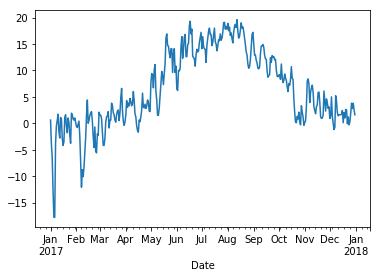

In [126]:
%matplotlib inline
wh2["Temperature"].plot()

In [128]:
rolling = wh2.Temperature.rolling(30, center=True)
rolling

Rolling [window=30,center=True,axis=0]

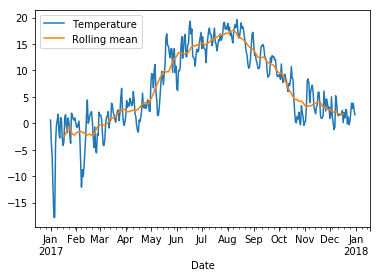

In [130]:
data = pd.DataFrame({"Temperature" : wh2.Temperature, "Rolling mean" : rolling.mean()})
data.plot()

In [119]:
r=pd.date_range("2017-01-01", "2017-01-31", freq="w-mon")
r

DatetimeIndex(['2017-01-02', '2017-01-09', '2017-01-16', '2017-01-23',
               '2017-01-30'],
              dtype='datetime64[ns]', freq='W-MON')

In [122]:
wh2[list(r)]

KeyError: "[Timestamp('2017-01-02 00:00:00', freq='W-MON')\n Timestamp('2017-01-09 00:00:00', freq='W-MON')\n Timestamp('2017-01-16 00:00:00', freq='W-MON')\n Timestamp('2017-01-23 00:00:00', freq='W-MON')\n Timestamp('2017-01-30 00:00:00', freq='W-MON')] not in index"

## External information

[Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/jttoivon/x/blob/master/pandas.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
